In [1]:
######################################################
# Multiple Linear Regression
######################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

##########################
# Data Understanding
##########################

# Read Excel file
df = pd.read_excel('/content/plm_approvals.xlsx')

# Review of dataset
print(df.head())
print(df.info())
print(df.shape)
print(df.describe().T)

   Complexity Change_Type   Department Requested_By  Approval_Days
0           7       Minor  Engineering        UserE             19
1           4       Major  Engineering        UserA             10
2           8       Minor  Engineering        UserE             17
3           5       Minor  Engineering        UserE             14
4           7    Moderate          R&D        UserB             21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Complexity     200 non-null    int64 
 1   Change_Type    200 non-null    object
 2   Department     200 non-null    object
 3   Requested_By   200 non-null    object
 4   Approval_Days  200 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 7.9+ KB
None
(200, 5)
               count  mean  std  min  25%   50%   75%   max
Complexity    200.00  4.99 2.61 1.00 3.00  5.00  7.00  9.00
Approval_

In [2]:
##########################
# Model (Holdout Metod)
##########################

# Converting categorical variables to numeric values
df = pd.get_dummies(df, drop_first=False)

# Features and target variable separation
X = df.drop('Approval_Days', axis=1)
y = df['Approval_Days']

# Separation into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create and train the model
reg_model = LinearRegression().fit(X_train, y_train)

# Save column names used during training
feature_names = X_train.columns

# Prediction
y_train_pred = reg_model.predict(X_train)
y_test_pred = reg_model.predict(X_test)

In [3]:
# bias (b)
reg_model.intercept_

1.9431027800207943

In [4]:
# coefficients (w - weights)
reg_model.coef_

array([ 1.83653561,  1.72788272, -1.17806147, -0.54982125, -0.34735422,
        0.23285994, -0.51802889, -0.68134055,  0.75936727, -0.14846055,
        0.702957  , -0.94672632, -0.14846055,  0.75936727, -0.51802889,
        0.5993721 ,  0.702957  , -0.68134055,  0.23285994])

In [5]:
##########################
# Prediction
##########################
sample_request = pd.DataFrame({
    'Complexity': [8],
    'Change_Type_Minor': [0],
    'Change_Type_Moderate': [0],
    'Change_Type_Major': [1],
    'Department_Quality': [0],
    'Department_Production': [0],
    'Department_R&D': [0],
    'Department_Engineering': [1],
    'Department_Maintenance': [0],
    'Department_Supply_Chain': [0],
    'Department_Project_Management': [0],
    'Requested_By_UserA': [1],
    'Requested_By_UserB': [0],
    'Requested_By_UserC': [0],
    'Requested_By_UserD': [0],
    'Requested_By_UserE': [0],
    'Requested_By_UserF': [0],
    'Requested_By_UserG': [0],
    'Requested_By_UserH': [0]
})

# Reorder the sample dataset by column names used in training the model
sample_request = sample_request.reindex(columns=feature_names, fill_value=0)

# Prediction for sample input
predicted_approval_days = reg_model.predict(sample_request)

print(f"Predicted approval time for sample change request: {predicted_approval_days[0]:.2f} days")

Predicted approval time for sample change request: 17.07 days


In [6]:
##########################
# Model Prediction Evaluation
##########################

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Train MSE: {mse_train:.2f}, Train R^2: {r2_train:.2f}')
print(f'Test MSE: {mse_test:.2f}, Test R^2: {r2_test:.2f}')

Train MSE: 8.30, Train R^2: 0.73
Test MSE: 10.27, Test R^2: 0.70


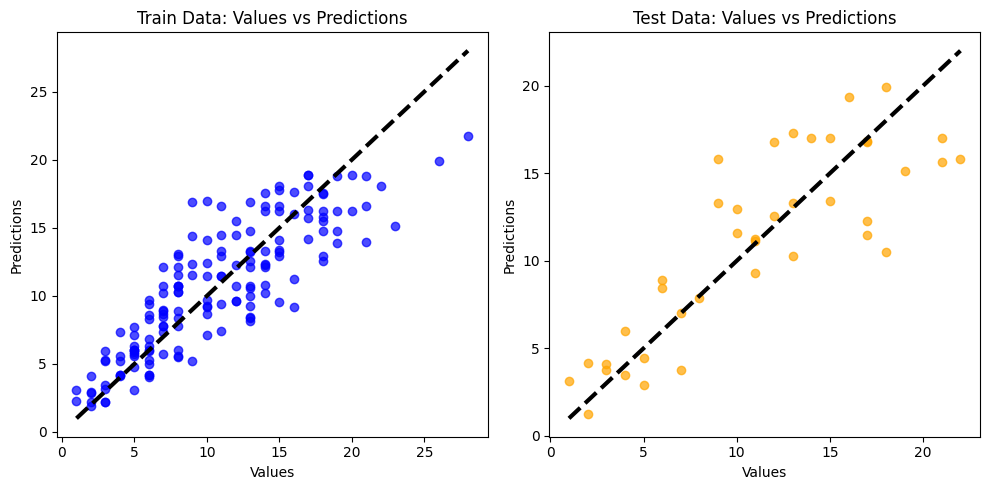

In [7]:
##########################
# Visualization of Predictions
##########################

plt.figure(figsize=(10, 5))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7, color='blue')
plt.xlabel('Values')
plt.ylabel('Predictions')
plt.title('Train Data: Values vs Predictions')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)

# Test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7, color='orange')
plt.xlabel('Values')
plt.ylabel('Predictions')
plt.title('Test Data: Values vs Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)

plt.tight_layout()
plt.show()